# MSc in Data Science and Big Data 
## Master Thesis
## Innovation & Entrepreneurship Business School
### Guillermo Altesor 


In this notebook we will create visualization of our data, in order to extract insights for our report.

In [2]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

data = pd.read_csv("Clean_text_ATT.csv")
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,u_Id,u_Country,u_Contributions,u_Trip_type,Review,clean_text,r_Rating,r_Date,r_Helpful,i_Island,Item,i_Rating,i_Reviews,i_Excellent,i_Very_good,i_Average,i_Poor,i_Terrible,i_Type
0,1,United Kingdom,7,NaN,"Worth the trip, cable car needs minimum 90 min...",worth trip cable car needs minimum mins queue ...,4.0,2022-07-26,1,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
1,2,United Kingdom,7,NaN,Must see of Tenerife - A must see site on Tene...,must see tenerife must see site tenerife take ...,5.0,2022-07-25,0,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
2,3,United Kingdom,44,Family,A must visit place in tenerife. - Absolutely a...,must visit place tenerife absolutely awesome p...,5.0,2022-07-17,0,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
3,4,NaN,8,Family,Hike to the summit. - A drive up to El Tiede f...,hike summit drive el tiede coast followed trip...,5.0,2022-07-17,0,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos
4,5,United Kingdom,52,Couples,Spectacular - It's number one for a reason. O...,spectacular 's number one reason 's wonderful ...,5.0,2022-07-17,1,Tenerife,Volcan El Teide,4.5,13470,9917,2729,552,151,121,Volcanos


In [15]:
data.drop(['u_Country', 'u_Trip_type','i_Island', 'i_Rating', 'i_Reviews', 'i_Excellent', 'i_Very_good', 'i_Average', 'i_Poor', 'i_Terrible'], inplace=True, axis=1)
data["is_bad_review"] = data["r_Rating"].apply(lambda x: 1 if x < 5 else 0)
data = data.reindex(['u_Id', 'u_Contributions', 'Review', 'clean_text', 'r_Rating','is_bad_review', 'r_Date', 'r_Helpful', 'Item', 'i_Type'], axis=1)
data.head()

,u_Id,u_Contributions,Review,clean_text,r_Rating,is_bad_review,r_Date,r_Helpful,Item,i_Type
0,1,7,"Worth the trip, cable car needs minimum 90 min...",worth trip cable car needs minimum mins queue ...,4.0,1,2022-07-26,1,Volcan El Teide,Volcanos
1,2,7,Must see of Tenerife - A must see site on Tene...,must see tenerife must see site tenerife take ...,5.0,0,2022-07-25,0,Volcan El Teide,Volcanos
2,3,44,A must visit place in tenerife. - Absolutely a...,must visit place tenerife absolutely awesome p...,5.0,0,2022-07-17,0,Volcan El Teide,Volcanos
3,4,8,Hike to the summit. - A drive up to El Tiede f...,hike summit drive el tiede coast followed trip...,5.0,0,2022-07-17,0,Volcan El Teide,Volcanos
4,5,52,Spectacular - It's number one for a reason. O...,spectacular 's number one reason 's wonderful ...,5.0,0,2022-07-17,1,Volcan El Teide,Volcanos


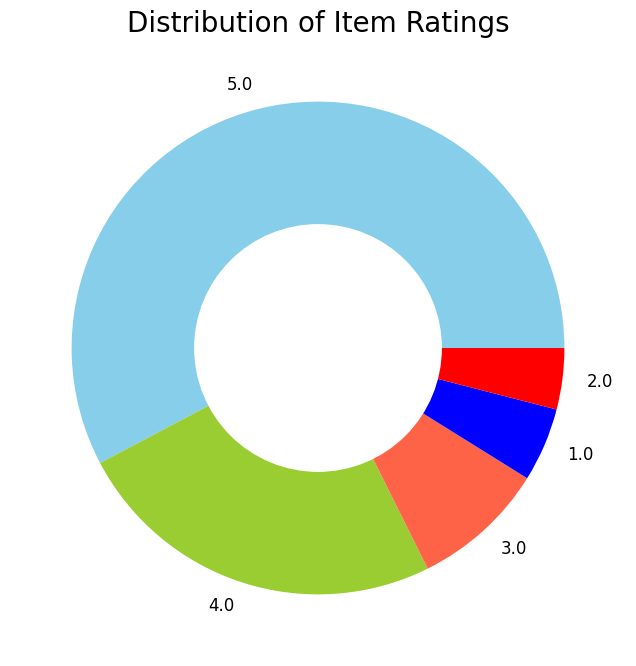

In [16]:
ratings = data["r_Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Item Ratings", fontsize=20)
plt.show()

In [17]:
# add sentiment anaylsis columns

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["clean_text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

In [18]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["Review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["clean_text"].apply(lambda x: len(x.split(" ")))

In [19]:
reviews_df.head()

,u_Id,u_Contributions,Review,clean_text,r_Rating,is_bad_review,r_Date,r_Helpful,Item,i_Type,neg,neu,pos,compound,nb_chars,nb_words
0,1,7,"Worth the trip, cable car needs minimum 90 min...",worth trip cable car needs minimum mins queue ...,4.0,1,2022-07-26,1,Volcan El Teide,Volcanos,0.000,0.738,0.262,0.8750,328,36
1,2,7,Must see of Tenerife - A must see site on Tene...,must see tenerife must see site tenerife take ...,5.0,0,2022-07-25,0,Volcan El Teide,Volcanos,0.000,0.698,0.302,0.8548,261,29
2,3,44,A must visit place in tenerife. - Absolutely a...,must visit place tenerife absolutely awesome p...,5.0,0,2022-07-17,0,Volcan El Teide,Volcanos,0.000,0.823,0.177,0.7960,329,36
3,4,8,Hike to the summit. - A drive up to El Tiede f...,hike summit drive el tiede coast followed trip...,5.0,0,2022-07-17,0,Volcan El Teide,Volcanos,0.060,0.697,0.243,0.9681,983,96
4,5,52,Spectacular - It's number one for a reason. O...,spectacular 's number one reason 's wonderful ...,5.0,0,2022-07-17,1,Volcan El Teide,Volcanos,0.146,0.622,0.231,0.6743,651,60


In [20]:
reviews_df.describe()


,u_Id,u_Contributions,r_Rating,is_bad_review,r_Helpful,neg,neu,pos,compound,nb_chars,nb_words
count,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000
mean,5024.143813,1877.317140,4.263590,0.422718,1.505172,0.046487,0.603688,0.349824,0.758655,432.414706,42.640365
std,2994.957450,26934.984628,1.092159,0.494016,5.854395,0.070563,0.141952,0.158121,0.395122,434.549776,40.750111
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.138000,0.000000,-0.986100,108.000000,9.000000
25%,2466.750000,9.000000,4.000000,0.000000,0.000000,0.000000,0.505000,0.235000,0.778300,191.000000,20.000000
50%,4936.500000,46.000000,5.000000,0.000000,1.000000,0.000000,0.606000,0.346000,0.915300,297.000000,30.000000
75%,7451.250000,208.000000,5.000000,1.000000,2.000000,0.073000,0.700000,0.462000,0.960600,510.000000,50.000000
max,12259.000000,611662.000000,5.000000,1.000000,214.000000,0.559000,1.000000,0.862000,0.999800,8452.000000,919.000000


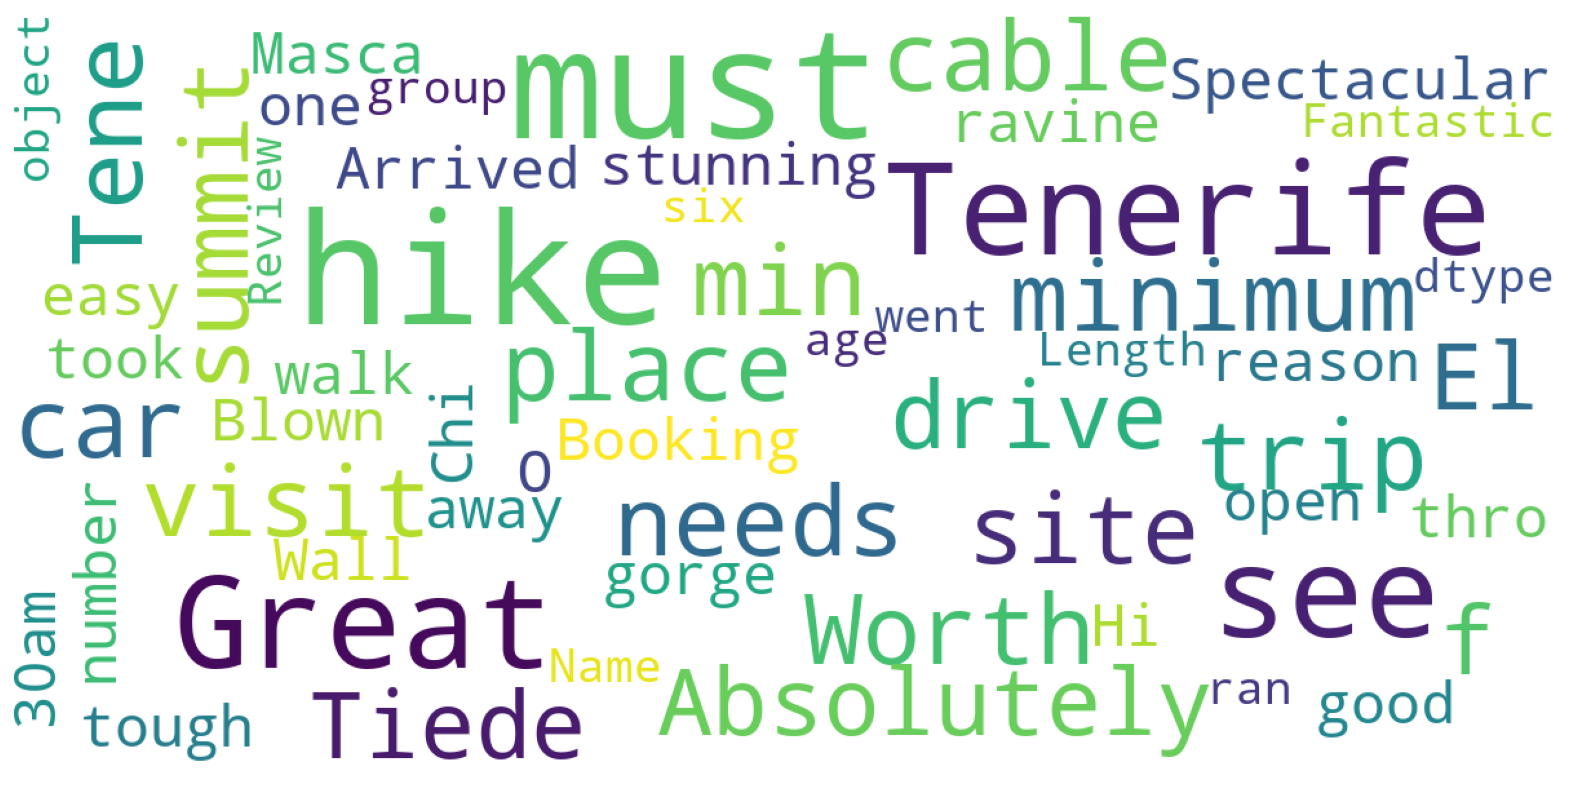

In [21]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["Review"])

In [22]:
# highest positive sentiment reviews
reviews_df.sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

,Review,pos
9625,"Fantastic - Great fun, good value and friendl...",0.862
3880,"Super - Everthing was good, we enjoyed very mu...",0.821
9666,Great value fun. - Great way to spend a few ho...,0.812
7949,Great carnival - Loved it had a wonderful tim...,0.807
9661,Fun!!! - Great fun for all. Lovely staff and a...,0.804
9546,Great time - Brilliant experience. All the sta...,0.803
9588,"Great Fun! - Lovely people, lovely service and...",0.802
3388,"Beautiful - This place is amazing, loved it so...",0.798
9796,Amazing fun! - Great fun for all ages! Super f...,0.794
6323,"Nightly fun and games - Amazing at night, fun ...",0.790


In [23]:
# lowest negative sentiment reviews
reviews_df.sort_values("neg", ascending = False)[["Review", "neg"]].head(10)

,Review,neg
3120,Cruel - Disgustingly cruel all the animals are...,0.559
6331,What a sad place - What a sad place this has b...,0.558
3075,Depressing - Hurt Guinea pigs with visible sic...,0.542
6226,Horrendous drug den - What a truly awful and d...,0.540
7050,Sorry to say I think this is overrated. - We ...,0.531
8596,Sad to see - The people in the Kasbah are suff...,0.526
8620,Disappointing. - Somewhat disappointing I fear...,0.524
8521,Of course NO - This was one of the worst resta...,0.514
6617,Waste of money - Waste of money Would not reco...,0.509
8726,Unfriendly - Unfriendly stuff. They seem to ca...,0.509


Text(0.5, 1.0, 'Rating Distribution Across Dataset')

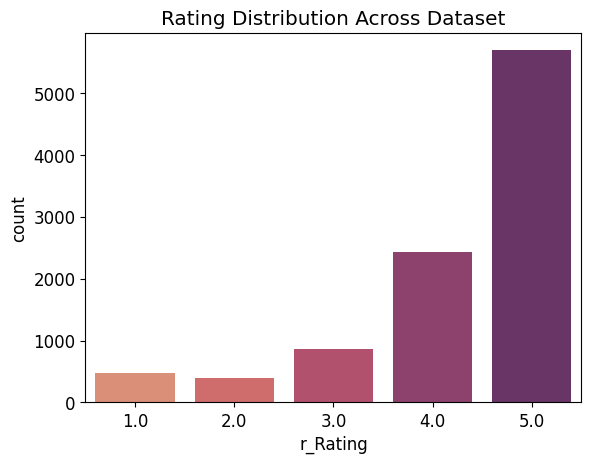

In [24]:
sns.countplot(data=reviews_df, x='r_Rating', palette='flare').set_title('Rating Distribution Across Dataset')

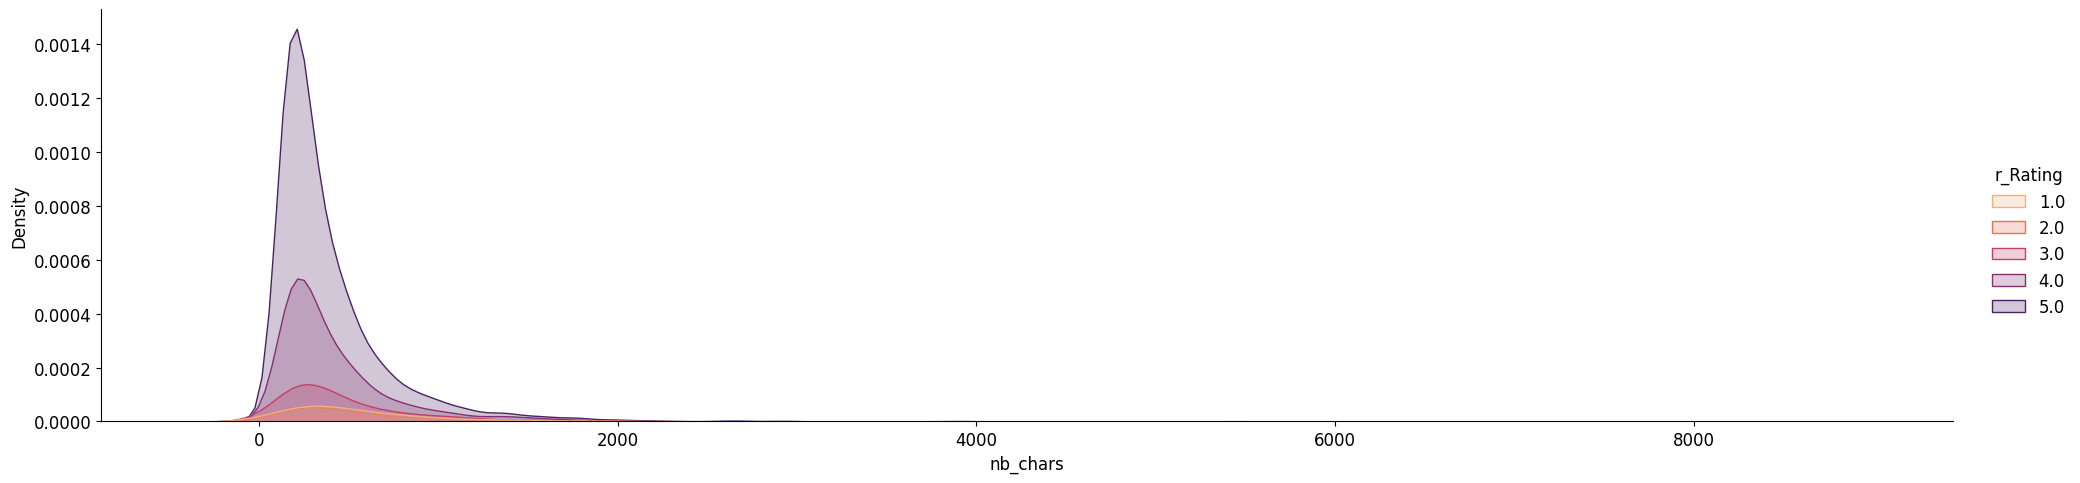

In [25]:
sns.displot(data=reviews_df, x='nb_chars', hue='r_Rating', palette='flare', kind='kde', fill=True, aspect=4)

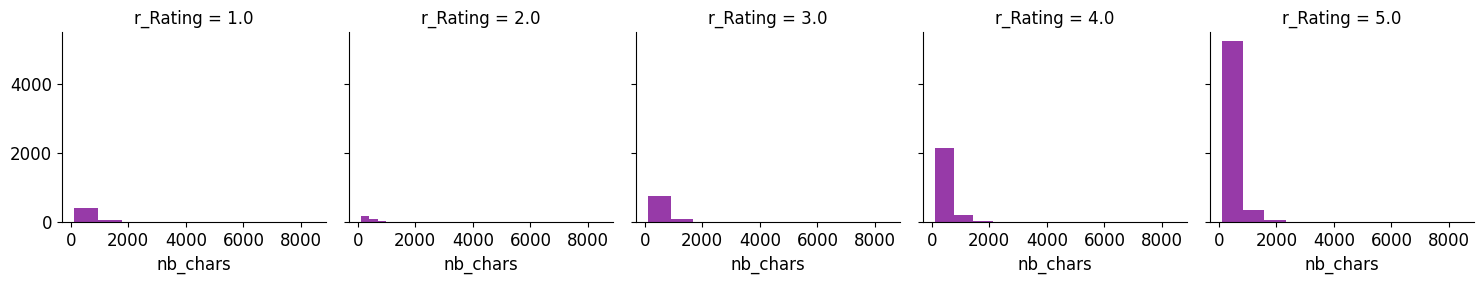

In [26]:
g = sns.FacetGrid(data=reviews_df, col='r_Rating')
g.map(plt.hist, 'nb_chars', color='#973aa8')

C:\Users\guill\AppData\Local\Temp\ipykernel_34148\2324179254.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=reviews_df, x='r_Rating', y='nb_chars', palette='flare', alpha=0.3)


<AxesSubplot:xlabel='r_Rating', ylabel='nb_chars'>

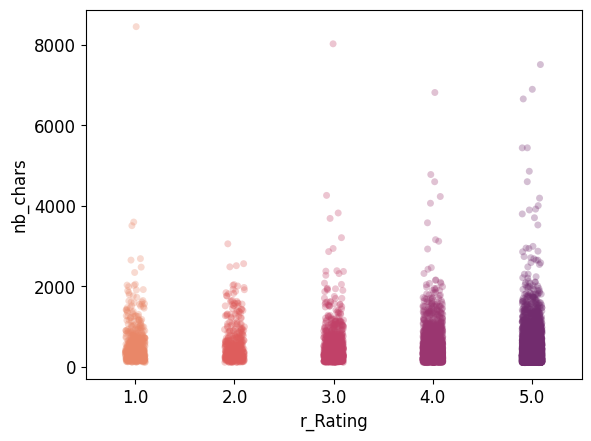

In [27]:
sns.stripplot(data=reviews_df, x='r_Rating', y='nb_chars', palette='flare', alpha=0.3)